<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Input points**



*  plot a set of points {(x(i),y(i))} that are loaded from 'data.csv' file (in black color)



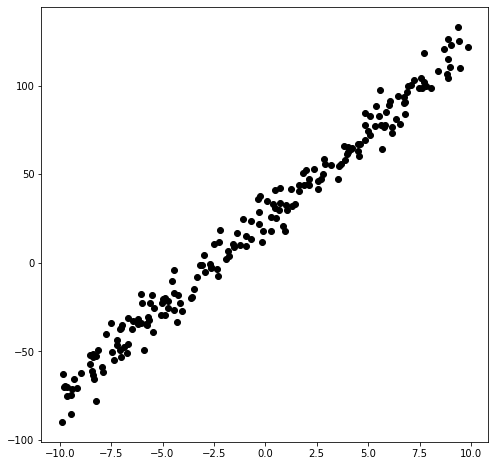

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import csv

path = "/content/drive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path,delimiter=',')

xi_data = data[:,0]
yi_data = data[:,1]

plt.figure(figsize=(8,8))
plt.scatter(xi_data,yi_data,color="black")
plt.show()

#**2.Linear regression result**


*   plot a set of points {(x(i),y(i))} that are loaded from 'data.csv' file (in black color)



In [0]:
xi_data = data[:,0]
yi_data = data[:,1]

* plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)


1. getting optimal solution by linear regression

(1) Linear Model

W (theta_1) = 1.0

b (theta_0) = 0.0

hypothesis = W*x + b = hθ​(x)=θ0​+θ1​x

In [0]:
W = 1.0
b = 0.0

n_data = number of data

steps = 1000 번의 학습 사이클. 

learning_rate = 0.03

In [0]:
n_data = len(xi_data)
steps = 5000
learning_rate = 0.01

(2) Objective Function

OF = objective function
 = J(θ)=2m1​∑i=1m​(hθ​(x(i))−y(i))2

(3) Gradient Descent

gradient_W : 

θ1(t+1)​:=θ1(t)​−αm1​∑i=1m​(hθ​(x(i))−y(i))x(i)

gradient_b :

θ0(t+1)​:=θ0(t)​−αm1​∑i=1m​(hθ​(x(i))−y(i))


In [94]:
W_array = []
b_array=[]
OF_array=[]

for i in range(steps):
  hypothesis = W*xi_data + b
  OF = np.sum((hypothesis - yi_data)**2)/(2*n_data)
  gradient_W = np.sum((hypothesis - yi_data)*xi_data)/n_data
  gradient_b = np.sum((hypothesis - yi_data))/n_data
  
  W -= learning_rate*gradient_W
  b -= learning_rate*gradient_b

  W_array.append(W)
  b_array.append(b)
  OF_array.append(OF)


  if i % 100 == 0:
        print('step ({:10d}/{:10d}) OF: {:10f}, W: {:10f}, b:{:10f}'.format(i, steps, OF, W, b))
        print()


step (         0/      5000) OF: 1532.126316, W:   3.795189, b:  0.205528

step (       100/      5000) OF:  69.798625, W:   9.793844, b: 15.764212

step (       200/      5000) OF:  33.225656, W:   9.882709, b: 21.535228

step (       300/      5000) OF:  28.250767, W:   9.915484, b: 23.663679

step (       400/      5000) OF:  27.574051, W:   9.927572, b: 24.448690

step (       500/      5000) OF:  27.482000, W:   9.932030, b: 24.738215

step (       600/      5000) OF:  27.469478, W:   9.933675, b: 24.844998

step (       700/      5000) OF:  27.467775, W:   9.934281, b: 24.884381

step (       800/      5000) OF:  27.467543, W:   9.934505, b: 24.898906

step (       900/      5000) OF:  27.467512, W:   9.934587, b: 24.904263

step (      1000/      5000) OF:  27.467507, W:   9.934618, b: 24.906239

step (      1100/      5000) OF:  27.467507, W:   9.934629, b: 24.906967

step (      1200/      5000) OF:  27.467507, W:   9.934633, b: 24.907236

step (      1300/      5000) OF:  27.

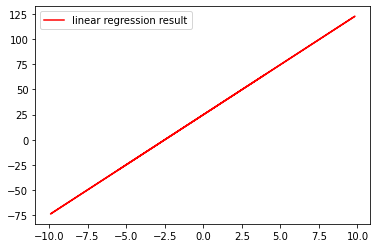

In [95]:
y = [W*x + b for x in xi_data]
plt.plot(xi_data,y,color="red",label="linear regression result")
plt.legend()
plt.show()



*   the estimated straight line (linear function) is superimposed on the set of points



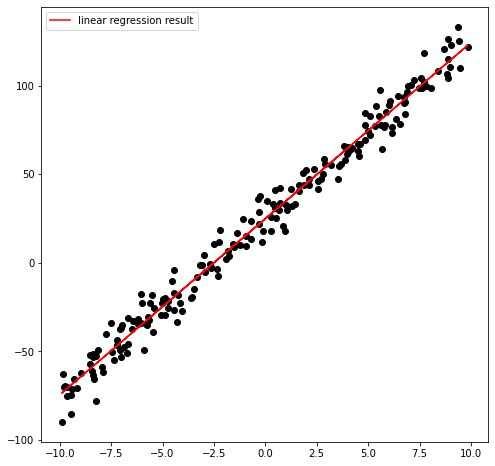

In [96]:
plt.figure(figsize=(8,8))
plt.scatter(xi_data,yi_data,color="black")

y = [W*x + b for x in xi_data]
plt.plot(xi_data,y,color="red",label="linear regression result")
plt.legend()
plt.show()

#**3. Plot the energy surface**



*   plot the energy surface (θ0,θ1,J(θ0,θ1)) with the range of variables θ0=[−30:0.1:30] and θ1=[−30:0.1:30]



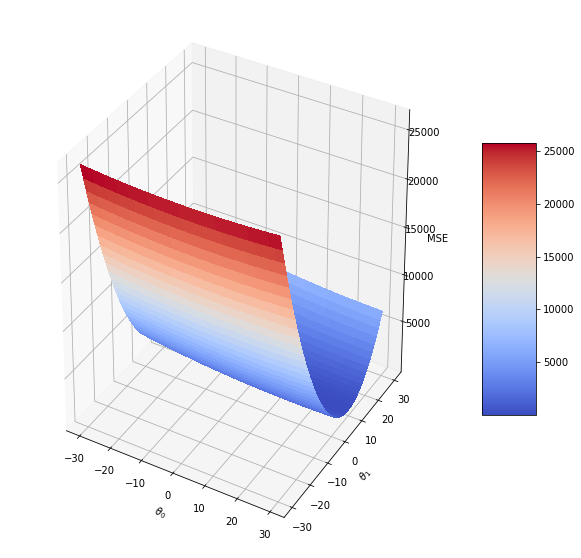

In [101]:
# 대안. 다만 실제 xi_data 를 고려하지 못하고, np.arange 로 랜덤으로 설정해야 함.
# 하지만, 밑의 코드에서는 Z가 2차원이 아니므로, 이걸 써야 함.

# 의문 사항 : 왜 그래프 모양이 오목한 모양이 아닐까?
# theta_1 이 9이면, theta_0 의 값에 상관 없이 J(theta_0,theta_1) 값이 동일한가?
# 동일하지는 않다. 다만, 다른 그래프에서는 J 값의 변화가 보인다. 
# 해결 방안 : linear regression gradient descent model 을 더 찾아보자.


from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#X =  np.arange(-100, 100, 1)
X=xi_data
#y = W*X + b
y=yi_data

theta_0 = theta_1 = np.arange(-30, 30, 0.1)

plt_theta_0, plt_theta_1 = np.meshgrid(theta_0, theta_1)

def calculate_mse(theta_0, theta_1):
    y_hat = theta_0 + theta_1 * X
    error = y_hat - y
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(X))) * sse)

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_theta_0, plt_theta_1).reshape(len(plt_theta_0), len(plt_theta_1))

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(plt_theta_0,
                       plt_theta_1,
                       mse,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
ax.set_xlabel(r'${\theta_0}$')
ax.set_ylabel(r'${\theta_1}$')
ax.set_zlabel(r'MSE')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [0]:
# # 현재 문제점 : b(theta_0)과 yi_data를 함께 계산하지 못함.
# # 해결 방안 : 행렬 곱셈으로 형태를 맞춰라.
# # 새로운 문제점 : b와 y_data 를 빼도, Z가 2차원이 아니란다.
# # 해결 방안 : 위의 코드를 쓰자.

# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import collections

# W=np.arange(-30,30,0.1)
# b=np.arange(-30,30,0.1)

# X, Y= np.meshgrid(W, b)

# W_10_60 = W.reshape(10,60,order='C')
# xi_data_20_10 = xi_data.reshape(20,10,order='C')
# #b_20_60 = b.reshape(20,60)

# hypothesis = np.dot(xi_data_20_10,W_10_60)
# # hypothesis = np.dot(xi_data_20_10,W_10_60)+ b
# Z= np.sum((hypothesis)**2)/(2*n_data)
# #Z= np.sum((hypothesis - yi_data)**2)/(2*n_data)

 
# fig= plt.figure()
# ax= fig.gca(projection='3d')             # 3d axes instance
# surf= ax.plot_surface(X, Y, Z,          # data values (2D Arryas)
#                        rstride=2,                   # row step size
#                        cstride=2,                  # column step size
#                        cmap=cm.RdPu,       # colour map
#                        linewidth=1,               # wireframe line width
#                        antialiased=True)
 
# ax.set_title('Hyperbolic Paraboloid')       # title
# ax.set_xlabel('x label')                            # x label
# ax.set_ylabel('y label')                            # y label
# ax.set_zlabel('z label')                            # z label
# fig.colorbar(surf, shrink=0.5, aspect=5)  # colour bar
 
# ax.view_init(elev=30,azim=70)               # elevation & angle
# ax.dist=8                                                  # distance from the plot
# plt.show()

In [0]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import collections

# def error(m, b, points):
#     totalError = 0
#     for i in range(0, len(points)):
#         totalError += (points[i].y - (m * points[i].x + b)) ** 2
#     return totalError / float(len(points))

# x=xi_data
# y=yi_data
# Point = collections.namedtuple('Point', ['x', 'y'])

# print(Point)

# m = b = np.arange(-30,30,0.1)
# # noise = np.random.random(x.size)
# # points = [Point(xp, m*xp+b+err) for xp,err in zip(x, noise)]
# # points = [Point(xp, m*xp+b) for xp in x]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # ms = np.linspace(2.0, 4.0, 10)
# # bs = np.linspace(1.5, 2.5, 10)

# ms = np.arange(-30, 30, 0.1)
# bs = np.arange(-30, 30, 0.1)

# M, B = np.meshgrid(ms, bs)
# print("test1")
# zs = np.array([error(mp, bp, points) 
#                for mp, bp in zip(np.ravel(M), np.ravel(B))])
# print("test2")
# Z = zs.reshape(M.shape)

# ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

# ax.set_xlabel('m')
# ax.set_ylabel('b')
# ax.set_zlabel('error')

# plt.show()